# Logistic regression - In depth

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from src.classification_visualization import load_and_plot, plot_data_with_decsion_boundry, plot_sigmoid_function

# 1. The logistic regression model

[Logistic regression](https://developers.google.com/machine-learning/crash-course/logistic-regression/video-lecture) is a linear classifer that is able to produce probablities as well as predicted lables. Instead of predicting exactly 0 or 1, logistic regression generates a probability—a value between 0 and 1, exclusive. For example, consider a logistic regression model for spam detection. If the model infers a value of 0.932 on a particular email message, it implies a 93.2% probability that the email message is spam.

**Logistic regression summary**:  
* Type: Linear classifier  
* Assumption: The decision boundry is a linear line/surface/hyper-plane  
* Model parameters: Weights of the hyper-plane ($\mathbf{w}$, b)
* Loss function: [Log loss](https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training)
* Training algorithm: [Gradient decent](https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent)
* Inference algorithm: Class A if $\frac{1}{1+e^{-z}}$ > 0.5 else class B where $z=\mathbf{w}^\intercal \mathbf{x} + b$


In logistic regression, the training algorithm computes the weights vector for each feature of the input features, and a bias term. In a successful training, the learned weights seperates optimally between the two classes. To classify a new point (vector), $\mathbf{x}$, we compute:
1. $z=\mathbf{w}^\intercal \mathbf{x} + b$ (or in a simple notation, for observation number i: $z_i = b + w_1 * x_{i1} + w_2 * x_{i2} + \cdots + w_n * x_{in}
$)
2. sigmoid(z), or $\frac{1}{1+e^{-z}}$

Remember that:
* z is proportional to the distance of the point (vector) $\mathbf{x}$ from the the decision boundry, represented by $\mathbf{w}$, and can be in the range of $(-\infty, \infty)$
* The sigmoid job is __only__ to transform z to probability, i.e. map a number from the range $(-\infty,\infty)$ to the range $(0, 1)$  
* if $z$ = 0, the point is on the decision boundry. Thus, we can't determine to which class it belnogs. The sigmoid function ineed equal to 0.5 when $z$ is 0, indicated a 50-50 probability.
* if $z$ > 0, than the point belong to one class, and if $z$ < 0, the point belong the other class. 
* The bigger and positive $z$ is, the further above the decision boundry the point is, the more certain we are that the point belongs to class one. And indeed, for increasingly positive $z$s, the sigmoid function returns values that are closer and closer to 1. (note that for $z>4$ the probolility is already very close to one, see graph below)
* The bigger and negative $z$ is, the further below the decision boundry the point is, the more certain we are that the point belongs to class zero. And indeed, for increasingly negative $z$s, the sigmoid function returns values that are closer and closer to 0 (thus 0 chance of belonging to class 1, and 1 minus 0 chance of belonging to class 0, also note that for $z<-4$ the probolility is already very close to zero, see graph below)

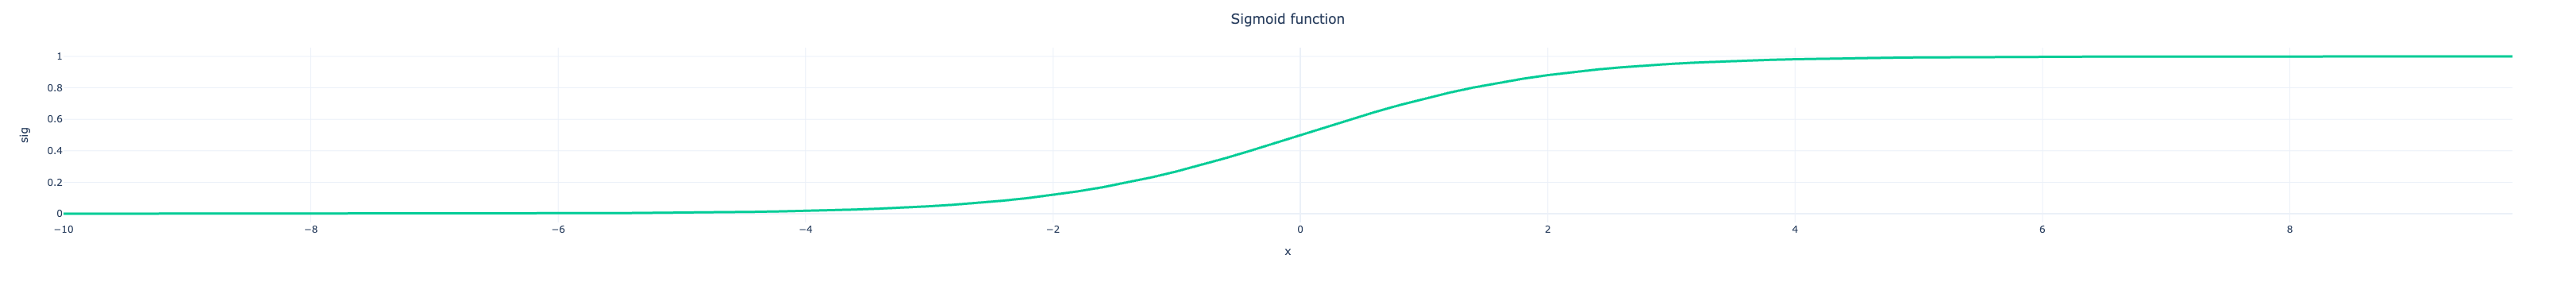

In [5]:
plot_sigmoid_function()

## The cost function

A cost function of the logistic regression model, and of many other classification models (i.e. DNNs) is called __cross-entropy__, or __logloss__ and is defined by the following formula:

$$\text{Log Loss} = J = \sum_{(x,y)\in D} -y\log(\widehat{y}) - (1 - y)\log(1 - \widehat{y})$$


where:

* $((x,y)\in D)$ is the data set containing many labeled examples, which are $((x,y))$ pairs.
* $y$ is the label in a labeled example.  Since this is logistic regression, every value of $y$ must either be 0 or 1.
* $\widehat{y}$ is the predicted value (somewhere between 0 and 1), given the set of features in $x$.

Note also that:

* when $y_i=0$, the first term cancels out (since $y_i=0$). Therefore, we will consider the two extreme cases for $\hat{y_i}=0$ in the second term of the equation $((1-y_i)\log(1-\hat{y_i}))$:

  * when $\hat{y_i}=0$, we have that $\log(1-\hat{y_i})=\log(1)=0$. Therefore, our cost $J=0$. Note that this makes perfect sense, since $y_i=0$ and $\hat{y_i}=0$.
  * when $\hat{y_i}=1$, we have that $\log(1-\hat{y_i})=\log(0)=\infty$. Now, our cost $J=\infty$. That is, the more different $y_i$ and $\hat{y_i}$ are, the higher our cost.

* when $y_i=1$, the second term cancels out (since $(1-y_i)=0$). Again, we will consider the two extreme cases for $\hat{y_i}=0$, but now in the first term of the equation $(y_i\log(\hat{y_i}))$:
  * when $\hat{y_i}=0$, we have that $\log(\hat{y_i})=\infty$. Therefore, our cost $J=\infty$. Again, since $y_i$ and $\hat{y_i}$ are very different, the cost tends to increase.
  * when $\hat{y_i}=1$, we have that $\log(\hat{y_i})=\log(1)=0$. Now, our cost $J=0$. Again, this makes perfect sense, since $y_i=1$ and $\hat{y_i}=1$.

To find the minimal log loss, we need to find the optimal values of the weights $b, w_1, ..., w_n$ that minimize the log loss function.
The log loss function for logistic regression is convex but does not have a closed-form analytical solution, which means we cannot find the optimal values of the weights by simply setting the gradient to zero and solving for the weights. 
Instead, we must use numerical optimization techniques, such as gradient descent, to minimize the log loss function iteratively. So, in logistic regression, it is only possible to solve for the minimal log loss numerically, not analytically.  
The algorithm we will use to iteratively get closer and closer to the minimal cost is called __gradient decent__. (more about convex optimization problems and gradient decent in the coming sections)

## Gradient decent

Gradient descent is an iterative optimization algorithm used for minimizing a differentiable function, commonly employed in machine learning and deep learning to optimize the cost or loss functions.
The main idea behind gradient descent is to iteratively update the model's parameters (such as weights and biases) in the direction of the negative gradient of the cost function with respect to those parameters. This is done to minimize the cost function, as the negative gradient indicates the direction of the steepest decrease in the function's value. If the cost function is convex, we are (almost) guarnteed to reach the global minimum, thus we will find the optimal paramenters of the model. 

A convex loss function is bowl-shaped, and have one minima, which is the global minima. On the contrary, non-convex loss function have multiple minimas, some much "higher" than the global minima. See the following illustration: 


![alt](https://i.pinimg.com/originals/89/f9/bd/89f9bddacf547661dfc209d4b31c2c12.png) 

In gradient decent, we compute the function gradient (slope) value at a the start point, and apdate the model paramenrs by substracting a portion (we call that portion the learinng rate, 0.1 is very common) of the gradient value. by substracting that minor part, we are decending on the loss function at the direction of the gradient, hence the name **Gradient decent**. The apdated weights will have a smaller loss, and we can repeat the process, denecnding on the loss function with each iteration, until reaching a minima. If the loss function is convex **and the learning rate is set small enough** we are guarnteed to reach a minima, and that the minima we've reached is the global minima, which means we've reached the optimal set of model paramenrs. 

The process can be imagined as walking down a mountain, blind folded, at the fastest rate possible. Which direction will we go? We will use our foot to estimate the slop in each possible direction, and choose the directing with the maximal neative slope (the gradient). Than we will take a small step in that direction (we are blind folded, remember? be carefull!) - we will repeat that until we will safely reach the bottom. 

The algorithm:
1. Initialize the model's parameters with random values or using some initialization technique.
2. Compute the cost or loss function for the current set of parameters.
3. Calculate the gradient of the cost function with respect to each parameter. The gradient is a vector that represents the partial derivatives of the function concerning each parameter.
4. Update the parameters by taking a step in the direction of the negative gradient. The step size is determined by a hyperparameter called the learning rate. A smaller learning rate leads to slower convergence but potentially better accuracy, while a larger learning rate can speed up convergence but may overshoot the optimal solution.
5. Repeat steps 2-4 until the algorithm converges, which is typically determined by a maximum number of iterations, a threshold for the change in the cost function, or a threshold for the change in the parameters.

## Derivites of the cost function with respect to the model parameters

To initialize the gradient decent process, we need the equations for the partial derivatives (i.e., the derivatives in respect to each model parameter. Don't worry, there are only 2 type of such derivatives in logistic regression, one for $b$ and one for any $w_i$).

The derivatives with respect to $b$ and $w_i$ are as follows: (see the full deriavion process in the cell below):

$\frac{\partial}{\partial w_i}J(z) = -\frac{1}{N}\sum_j^N (y_j - \widehat{y}_i)x_i$

$\frac{\partial}{\partial b}J(z) = -\frac{1}{N}\sum_j^N (y_j - \widehat{y}_j)$

<details><summary>Click here for the full derivation</summary>

    
To calculate the derivative of our cost function  $J(z)$,  first let's calculate $\log(\widehat{y}_i)$:

$\log(\widehat{y}_i) = log\frac{1}{1+e^{-z}} = log(1) - log(1+e^{-z}) = -log(1+e^{-z})$

$\log(1-\widehat{y}_i) = log \left(1-\frac{1}{1+e^{-z}}\right) = log(e^{-z}) - log(1+e^{-z}) = -z -log(1+e^{-z})$

Substituting the previous two equations in the cost function formula, we have:


$J(z) = -\frac{1}{N}\sum_{i}^N \left[-y_i\log(1+e^{-z}) + (1-y_i)(-z -\log(1+e^{-z}))\right]$

Performing the distributions, we can simplify the above equation to:

$J(z) = -\frac{1}{N}\sum_{i}^N \left[y_iz -z -\log(1+e^{-z})\right]$

Since:

$-z -\log(1+e^{-z}) = -\left[\log e^{z} + log(1+e^{-z})\right] = -log(1+e^z)$

We have:

$J(z) = -\frac{1}{N}\sum_{i}^N \left[y_iz -\log(1+e^z)\right]$

As the derivative of the difference is equal to the difference of the derivatives, we can calculate each individual derivative with respect to $w$:

$\frac{\partial}{\partial w_i}y_iz = y_ix_i,\quad \frac{\partial}{\partial w_i}\log(1+e^z) = \frac{x_ie^z}{1+e^z} = x_i \widehat{y}_i$

and with respect to $b$:

$\frac{\partial}{\partial b}y_iz = y_i,\quad \frac{\partial}{\partial b}\log(1+e^z) = \frac{e^z}{1+e^z} = \widehat{y}_i$

Thus, the derivative of our cost function $J(z)$ is:

$\frac{\partial}{\partial w_i}J(z) = -\frac{1}{N}\sum_i^N (y_i - \widehat{y}_i)x_i$
    
$\frac{\partial}{\partial b}J(z) = -\frac{1}{N}\sum_i^N (y_i - \widehat{y}_i)$
</details>

Thus the Update rules:

$w_i \leftarrow w_i + \alpha \sum_i^N (y_i - \widehat{y}_i)x_i$

$b \leftarrow b + \alpha \sum_i^N (y_i - \widehat{y}_i)$

Where $\alpha$ is a small number, say 0.01, representing the learning rate.  
__Note__: Since we want to update the params in the negative direction of the gradient (thus, decent), we end up adding a small portion of the gradient (since the gradient is negative and we subtract a negative value)

### Gradient decent implementation

In [386]:
class MyLogisticRegression():
    def __init__(self, lr=0.01, max_iter=100):
        self.lr = lr
        self.max_iter = max_iter
        self.w = None
        self.b = None
    
    def fit(self, x, y):
        self.w = 2*np.random.random((1, x.shape[1])) -1 
        self.b = 2*np.random.random() -1
        
        for step in range(self.max_iter):
            z = self.__calc_z(x)
            y_pred = self.__sigmoid(z)
            error = y - y_pred
            #print(f'Error shape: {error.shape}. Sum error: {error.sum()}')
            self.w = self.w + self.lr * np.dot(error.T, x)
            self.b = self.b + self.lr * error.sum()
    
    def predict(self, x):
        return self.__sigmoid(np.dot(x, self.w.T) + self.b)
    
    def __sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
    
    def __calc_z(self, x):
        return np.dot(x, self.w.T) + self.b
    
    def __cost(self, y, y_pred):
        return (-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)).mean()

### Let's test our code

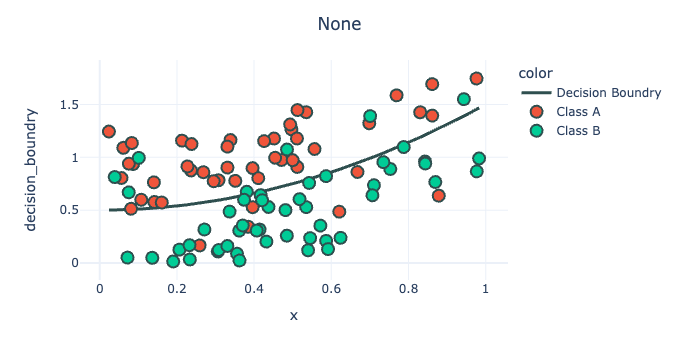

In [387]:
data, fig = load_and_plot('data/classification_problem.csv')
fig.show()

In [388]:
x, y = data[['x','y']].values, data['class_id'].map({'A':0, 'B':1}).values
y = np.expand_dims(y, 1)
print(x.shape, y.shape)

(100, 2) (100, 1)


In [389]:
our_lr_clf = MyLogisticRegression(max_iter=10000, lr=0.01)
our_lr_clf.fit(x, y)
print('coef_:', our_lr_clf.w)
print('intercept_:', our_lr_clf.b)

coef_: [[ 4.67667728 -4.71955701]]
intercept_: 1.4805159943623485


### Using sklearn

In [390]:
from sklearn.linear_model import LogisticRegression

In [391]:
log_reg = LogisticRegression(fit_intercept=True, penalty='none')
log_reg.fit(x, y.squeeze())

LogisticRegression(penalty='none')

In [392]:
print(log_reg.coef_)
print(log_reg.intercept_[0])

[[ 4.67668108 -4.71955843]]
1.480518879700615


# Refrences

1. [Logistic Regression from Scratch in Python](https://beckernick.github.io/logistic-regression-from-scratch/)
2. [Derivative of cost function for logistic Regression](https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression)